## Practical 4

**Aim**: Implement SVM classifier (Iris Dataset)

In [ ]:
!pip install numpy matplotlib scikit-learn

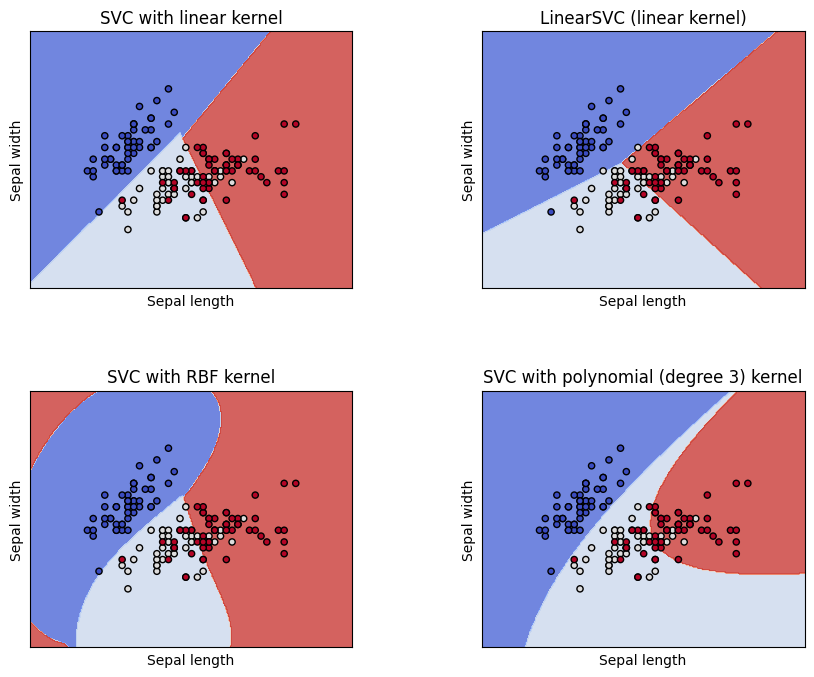

In [3]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Step 2: Define helper function to create a mesh grid for plotting
def make_meshgrid(x, y, h=0.02):
    """
    Create a mesh of points to plot in the decision boundary
    
    Parameters:
    - x: Data to base x-axis meshgrid on
    - y: Data to base y-axis meshgrid on
    - h: Step size for meshgrid, optional (default: 0.02)
    
    Returns:
    - xx, yy: ndarray of grid points
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Step 3: Define helper function to plot decision boundaries
def plot_contours(ax, clf, xx, yy, **params):
    """
    Plot the decision boundaries for a classifier.
    
    Parameters:
    - ax: Matplotlib axes object
    - clf: A classifier (SVM in this case)
    - xx: Meshgrid ndarray for x-axis
    - yy: Meshgrid ndarray for y-axis
    - params: Optional parameters for contourf
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Step 4: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]   # Take only the first two features for easy visualization
y = iris.target        # Target labels (0, 1, 2 for the three classes)

# Step 5: Define SVM models with different kernels
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C)
)

# Step 6: Train each model on the data
models = [clf.fit(X, y) for clf in models]

# Step 7: Titles for the subplots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel"
)

# Step 8: Plot the decision boundaries for each model
fig, sub = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Create the mesh grid for plotting
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Step 9: Loop through each model and plot
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    # Plot the data points
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

# Step 10: Display the final plots
plt.show()